In [1]:
import scipy.stats as scs
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib import cm
%matplotlib inline

from importlib import reload
import stock

In [2]:
dow_components = pd.read_csv('./component_list.csv', squeeze=True)
dow_components = sorted(dow_components)

In [3]:
len(dow_components)

28

In [4]:
dow_components

['AAPL',
 'AXP',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'DIS',
 'DWDP',
 'GE',
 'GS',
 'HD',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PFE',
 'PG',
 'TRV',
 'UNH',
 'UTX',
 'V',
 'VZ',
 'WMT',
 'XOM']

In [5]:
start = datetime.date(2015, 3, 19)
dows = {}

In [6]:
dows['AAPL'] = stock.Stock('AAPL', start=start)

In [9]:
dows['AXP'] = stock.Stock('AXP', start=start)

In [10]:
dows['BA'] = stock.Stock('BA', start=start)

In [11]:
dows['CAT'] = stock.Stock('CAT', start=start)

In [13]:
dows['CSCO'] = stock.Stock('CSCO', start=start)

In [14]:
dows['CVX'] = stock.Stock('CVX', start=start)

In [15]:
dows['DIS'] = stock.Stock('DIS', start=start)

In [16]:
dows['DWDP'] = stock.Stock('DWDP', start=start)

In [17]:
dows['GE'] = stock.Stock('GE', start=start)

In [18]:
dows['GS'] = stock.Stock('GS', start=start)

In [19]:
dows['HD'] = stock.Stock('HD', start=start)

In [20]:
dows['IBM'] = stock.Stock('IBM', start=start)

In [21]:
dows['INTC'] = stock.Stock('INTC', start=start)

In [22]:
dows['JNJ'] = stock.Stock('JNJ', start=start)

In [23]:
dows['JPM'] = stock.Stock('JPM', start=start)

In [24]:
dows['MCD'] = stock.Stock('MCD', start=start)

In [25]:
dows['MRK'] = stock.Stock('MRK', start=start)

In [26]:
dows['MSFT'] = stock.Stock('MSFT', start=start)

In [27]:
dows['NKE'] = stock.Stock('NKE', start=start)

In [29]:
dows['PFE'] = stock.Stock('PFE', start=start)

In [30]:
dows['PG'] = stock.Stock('PG', start=start)

In [31]:
dows['TRV'] = stock.Stock('TRV', start=start)

In [32]:
dows['UNH'] = stock.Stock('UNH', start=start)

In [33]:
dows['UTX'] = stock.Stock('UTX', start=start)

In [34]:
dows['V'] = stock.Stock('V', start=start)

In [36]:
dows['VZ'] = stock.Stock('VZ', start=start)

In [37]:
dows['WMT'] = stock.Stock('WMT', start=start)

In [38]:
dows['XOM'] = stock.Stock('XOM', start=start)

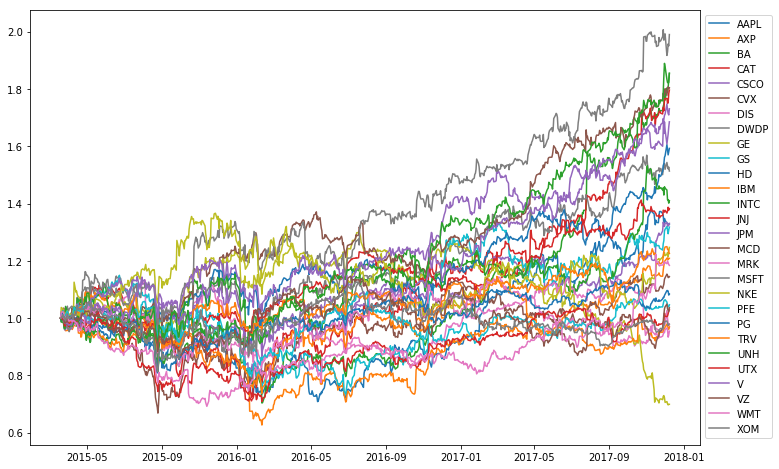

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for k, v in dows.items():
    v.simple_price_plot(ax=ax, reset_zero=True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

In [40]:
return_table = pd.DataFrame()
for k, v in dows.items():
    return_table[k] = v.data_table['log_return']
return_table = return_table.drop(return_table.index[0])

In [41]:
return_corr = return_table.corr()

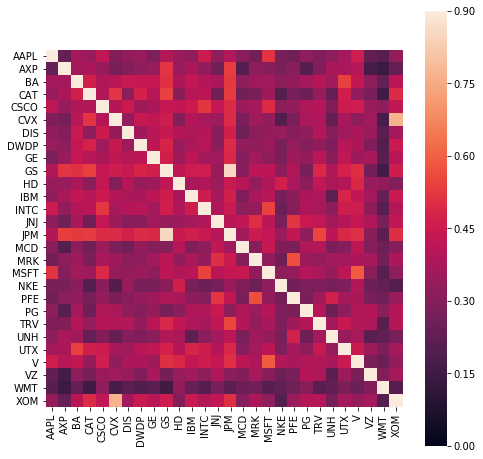

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(return_corr, vmin=0, vmax=0.9, square=True)

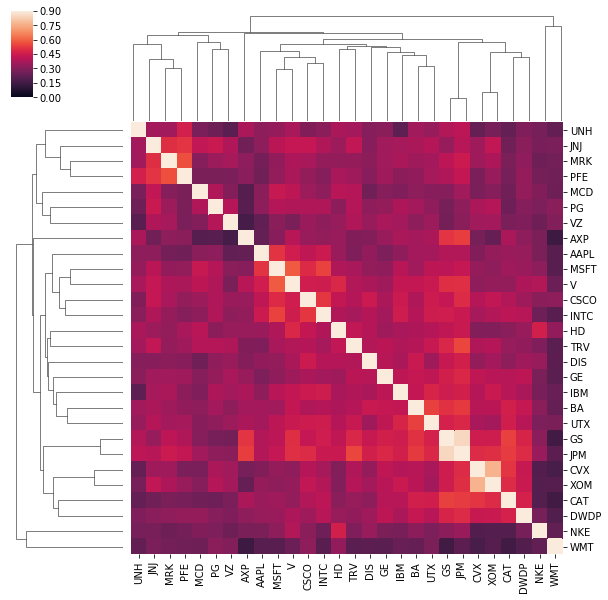

In [43]:
plt.figure(figsize=(10, 10))
sns.clustermap(return_corr, method='average', vmin=0, vmax=0.9, square=True)

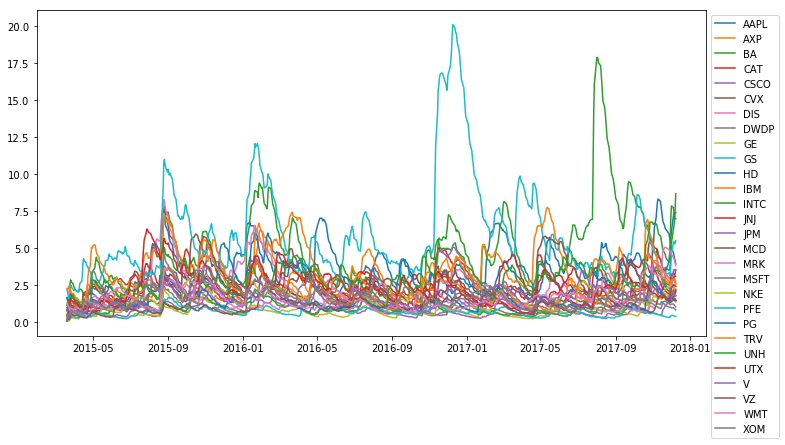

In [44]:
span=20
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
for k, v in dows.items():
    EMStd = v.getEMStd(span=span)
    ax.plot(EMStd.index.date, EMStd, label=k)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

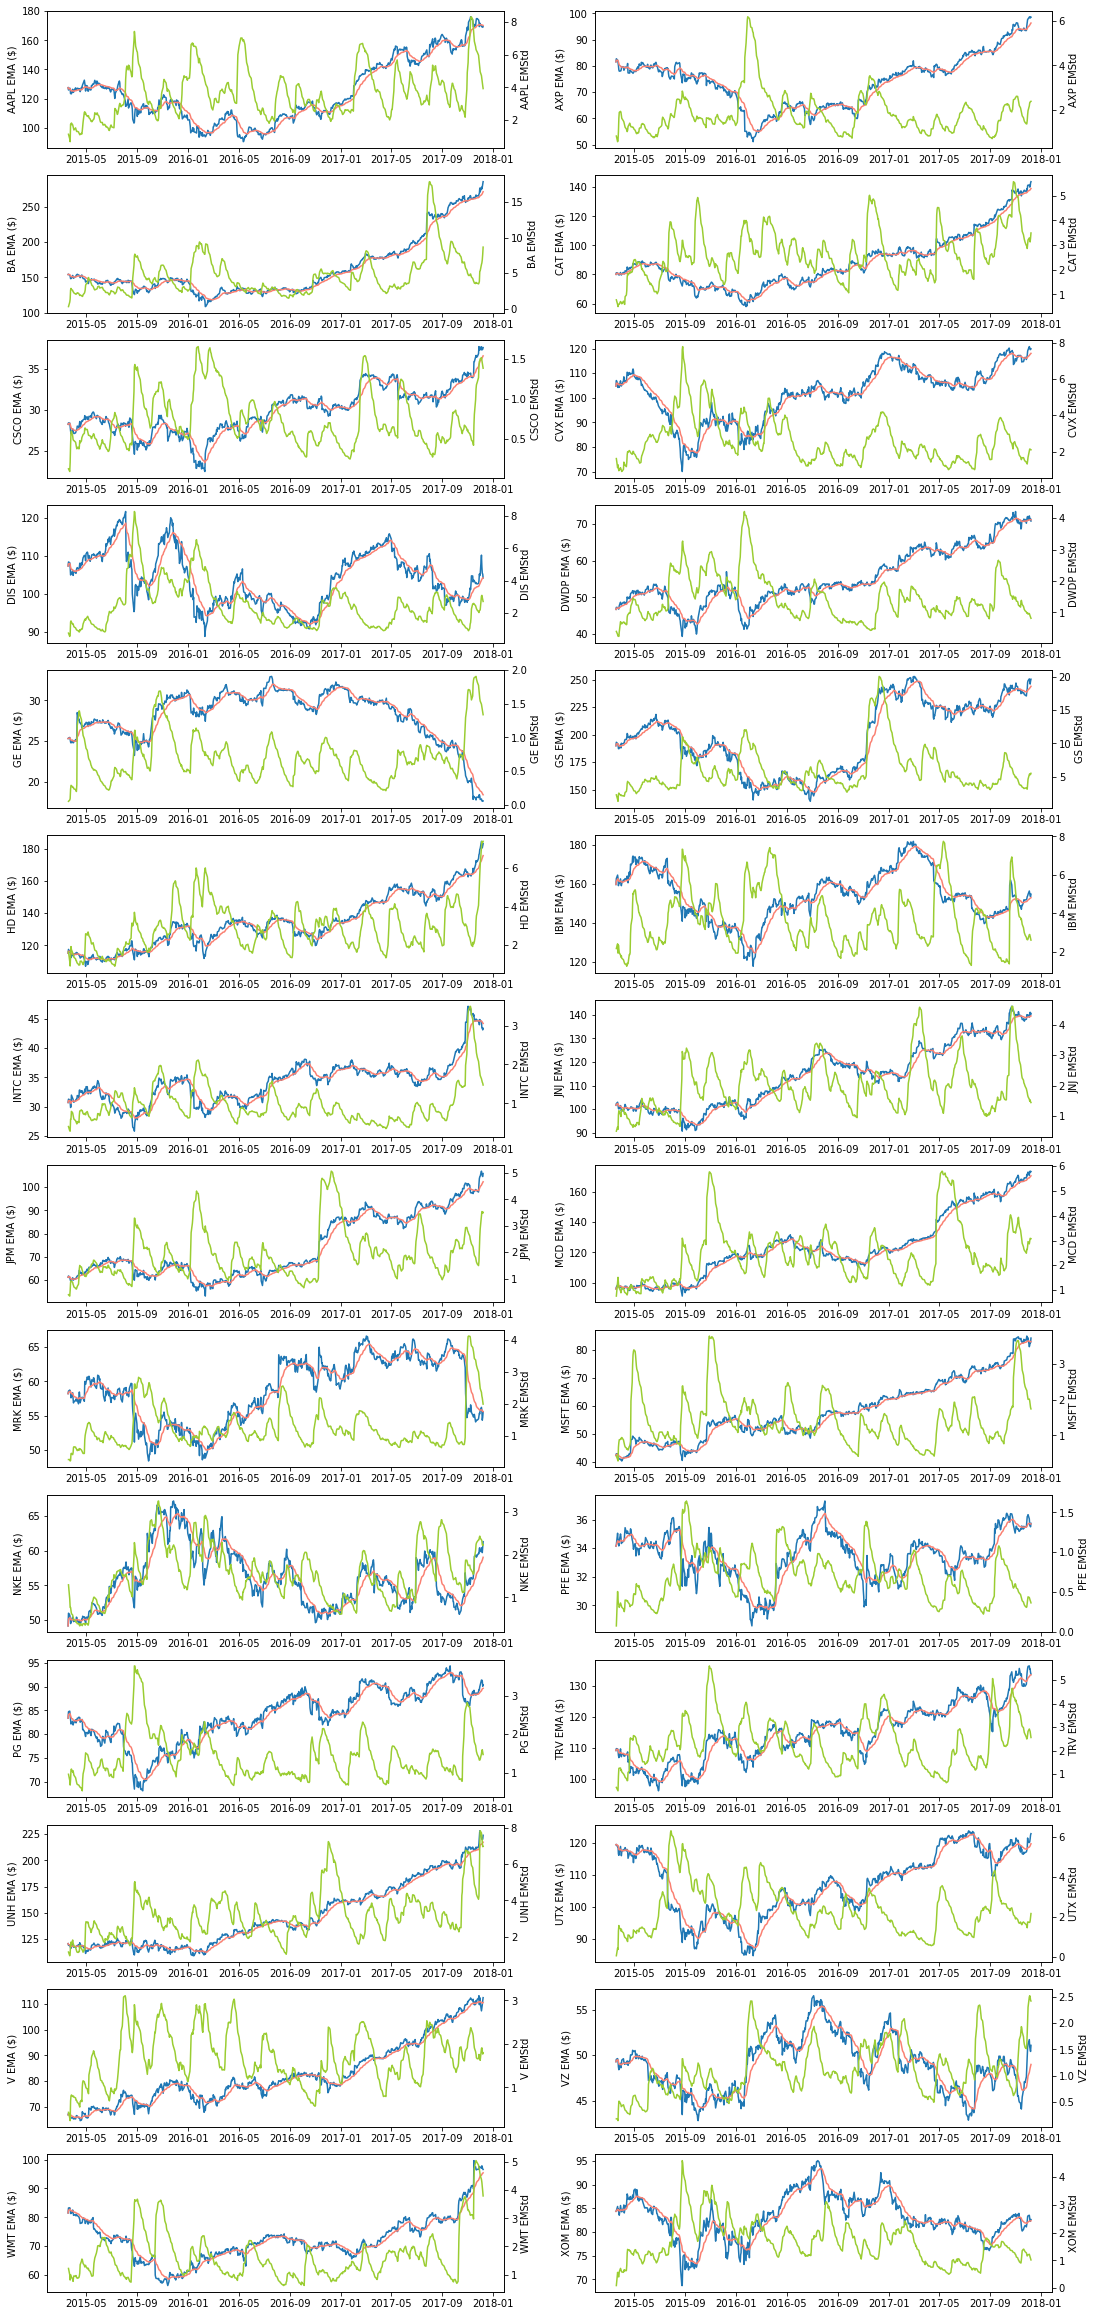

In [47]:
span=20
fig = plt.figure(figsize=(18, 45))
fig_pos = 1
for k, v in dows.items():
    ax1 = fig.add_subplot(15, 2, fig_pos)
    ax2 = ax1.twinx()
    v.plotEMA(span=span, ax=ax1)
    v.plotEMStd(span=span, ax=ax2, color='yellowgreen')
    
    fig_pos += 1